<a href="https://colab.research.google.com/github/harry418/Mask-Detection/blob/master/mask_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Dataset from kaggle

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harry418","key":"0947d6c5380269d84b6220203c2a336a"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d harry418/dataset-for-mask-detection

 71% 17.0M/23.9M [00:00<00:00, 40.6MB/s]
100% 23.9M/23.9M [00:00<00:00, 53.9MB/s]


In [6]:
! unzip '/content/dataset-for-mask-detection.zip'

Archive:  /content/dataset-for-mask-detection.zip
  inflating: dataset/with_mask/1.jpeg  
  inflating: dataset/with_mask/10.jpeg  
  inflating: dataset/with_mask/100.jpeg  
  inflating: dataset/with_mask/101.jpeg  
  inflating: dataset/with_mask/102.jpeg  
  inflating: dataset/with_mask/103.jpeg  
  inflating: dataset/with_mask/104.jpeg  
  inflating: dataset/with_mask/105.jpeg  
  inflating: dataset/with_mask/106.jpeg  
  inflating: dataset/with_mask/107.jpeg  
  inflating: dataset/with_mask/108.jpeg  
  inflating: dataset/with_mask/109.jpeg  
  inflating: dataset/with_mask/11.jpeg  
  inflating: dataset/with_mask/110.jpeg  
  inflating: dataset/with_mask/111.jpeg  
  inflating: dataset/with_mask/112.jpeg  
  inflating: dataset/with_mask/113.jpeg  
  inflating: dataset/with_mask/114.jpeg  
  inflating: dataset/with_mask/115.jpeg  
  inflating: dataset/with_mask/116.jpeg  
  inflating: dataset/with_mask/117.jpeg  
  inflating: dataset/with_mask/118.jpeg  
  inflating: dataset/with_mask

# Prepare dataset for FastAi

In [7]:
data_train = '/content/dataset'

In [8]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 8.1MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [9]:
from fastai.vision.all import *
from fastai.vision import *
from fastai.metrics import *

#from fastai.vision.core import *
from fastai.vision.data import *

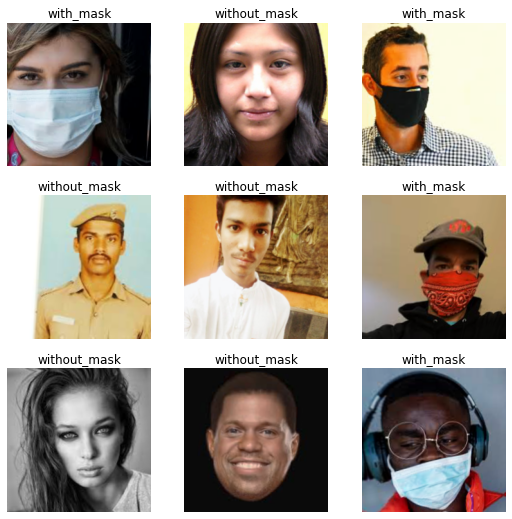

In [44]:
dblock = DataBlock(blocks= (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = parent_label,
                   splitter  = RandomSplitter(),
                   batch_tfms=aug_transforms(),
                   item_tfms = Resize(224))
dls = dblock.dataloaders(data_train)
dls.show_batch()

# ResNet18

In [46]:
learn = cnn_learner(dls,models.resnet18,metrics=[accuracy,error_rate])
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.680503,0.473342,0.886640,0.113360,00:04


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.203979,0.274481,0.894737,0.105263,00:05
1,0.138060,0.234655,0.906883,0.093117,00:05
2,0.109316,0.195709,0.914980,0.085020,00:05
3,0.080949,0.206488,0.914980,0.085020,00:05
4,0.077757,0.332929,0.890688,0.109312,00:05
5,0.064365,0.470024,0.886640,0.113360,00:05
6,0.054417,0.355877,0.910931,0.089069,00:05
7,0.050517,0.484325,0.898785,0.101215,00:05
8,0.039683,0.317202,0.919028,0.080972,00:05
9,0.036167,0.356403,0.919028,0.080972,00:05


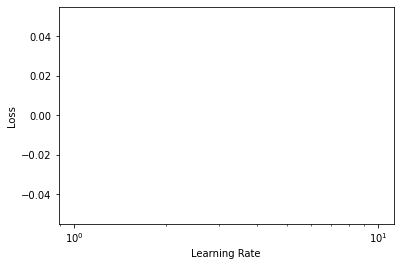

In [47]:
learn.lr_find()

In [48]:
# all layers now trainable
learn.unfreeze()
# optionally, separate LR and WD for each group
learn.fit_one_cycle(20, lr_max=(1e-4, 1e-5, 1e-6), wd=(1e-4,1e-4,1e-1))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.006826,0.102206,0.975708,0.024292,00:05
1,0.007882,0.105017,0.975708,0.024292,00:05
2,0.006155,0.100050,0.971660,0.028340,00:05
3,0.004611,0.100934,0.971660,0.028340,00:05
4,0.004031,0.149777,0.955466,0.044534,00:05
5,0.003627,0.156965,0.955466,0.044534,00:05
6,0.002828,0.142668,0.955466,0.044534,00:05
7,0.003338,0.146198,0.963563,0.036437,00:05
8,0.002892,0.230111,0.947368,0.052632,00:05
9,0.003487,0.295118,0.935223,0.064777,00:05


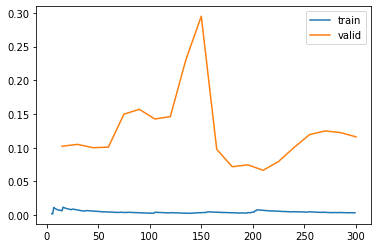

In [49]:
learn.recorder.plot_loss()

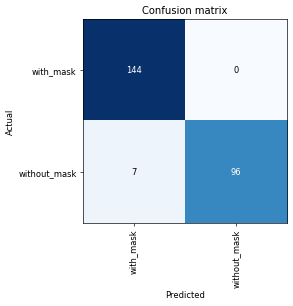

In [50]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [51]:
interp.print_classification_report()

              precision    recall  f1-score   support

   with_mask       0.95      1.00      0.98       144
without_mask       1.00      0.93      0.96       103

    accuracy                           0.97       247
   macro avg       0.98      0.97      0.97       247
weighted avg       0.97      0.97      0.97       247



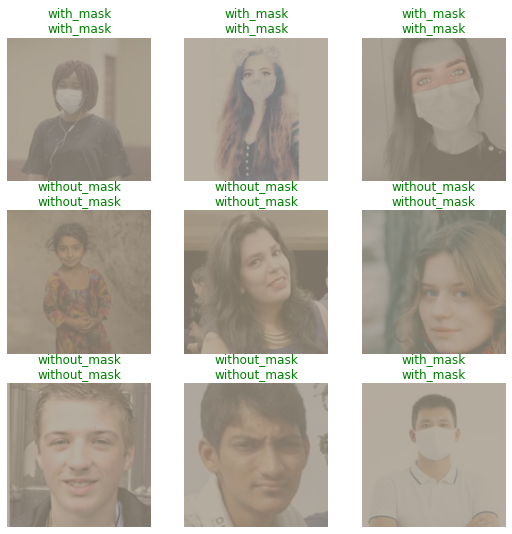

In [52]:
learn.show_results()

# Squeezenet

In [53]:
learn2 = cnn_learner(dls,models.squeezenet1_1,metrics=[accuracy,error_rate])
learn2.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.735040,0.573999,0.813765,0.186235,00:04


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.269328,0.275561,0.882591,0.117409,00:04
1,0.217069,0.348653,0.850202,0.149798,00:04
2,0.181099,0.346311,0.870445,0.129555,00:04
3,0.149625,0.279085,0.902834,0.097166,00:04
4,0.118653,0.132142,0.955466,0.044534,00:04
5,0.102325,0.860867,0.761134,0.238866,00:04
6,0.091204,0.387810,0.898785,0.101215,00:04
7,0.087689,0.175895,0.935223,0.064777,00:04
8,0.089517,0.166214,0.959514,0.040486,00:04
9,0.074770,0.253456,0.927126,0.072875,00:04


SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=9.12010818865383e-07)

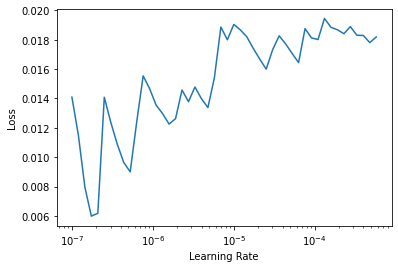

In [54]:
learn2.lr_find()

In [55]:
# all layers now trainable
#learn2.unfreee()
# optionally, separate LR and WD for each group
learn2.fit_one_cycle(20, lr_max=(1e-7, 1e-6, 1e-5), wd=(1e-4,1e-4,1e-1))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.036171,0.564444,0.870445,0.129555,00:04
1,0.027399,0.499031,0.874494,0.125506,00:04
2,0.021760,0.523339,0.870445,0.129555,00:04
3,0.025001,0.537476,0.870445,0.129555,00:04
4,0.019355,0.535347,0.870445,0.129555,00:04
5,0.019340,0.572579,0.870445,0.129555,00:04
6,0.027265,0.541787,0.870445,0.129555,00:04
7,0.022586,0.520075,0.874494,0.125506,00:04
8,0.020797,0.489749,0.878542,0.121458,00:04
9,0.020986,0.491687,0.874494,0.125506,00:04


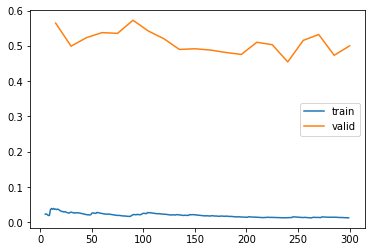

In [56]:
learn2.recorder.plot_loss()

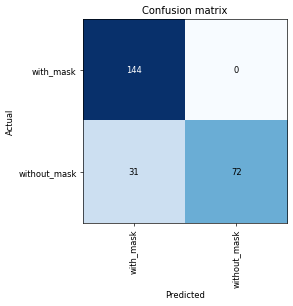

In [57]:
#width 600
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [58]:
interp.print_classification_report()

              precision    recall  f1-score   support

   with_mask       0.82      1.00      0.90       144
without_mask       1.00      0.70      0.82       103

    accuracy                           0.87       247
   macro avg       0.91      0.85      0.86       247
weighted avg       0.90      0.87      0.87       247



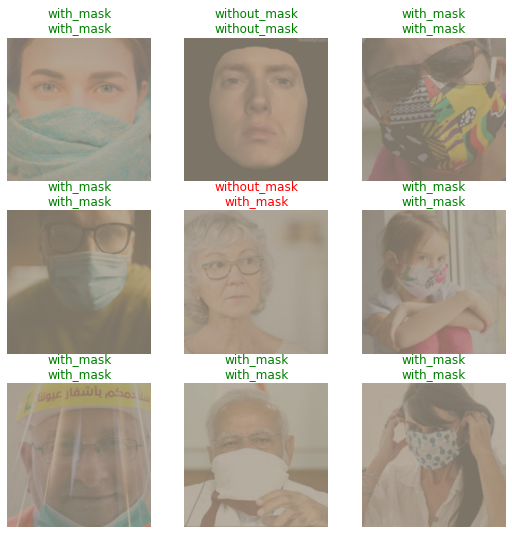

In [59]:
learn2.show_results()

# **Resnet34**

In [65]:
learn3 = cnn_learner(dls,models.resnet34,metrics=[accuracy,error_rate])
learn3.fine_tune(20)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.628986,0.209328,0.951417,0.048583,00:06


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.194285,0.173573,0.943320,0.056680,00:07
1,0.146509,0.194931,0.947368,0.052632,00:07
2,0.100839,0.113379,0.959514,0.040486,00:07
3,0.078205,0.101864,0.975708,0.024292,00:07
4,0.058505,0.080204,0.971660,0.028340,00:07
5,0.049571,0.267038,0.959514,0.040486,00:07
6,0.044766,0.309556,0.943320,0.056680,00:07
7,0.039499,0.268489,0.955466,0.044534,00:07
8,0.034514,0.210898,0.971660,0.028340,00:07
9,0.031297,0.386924,0.939271,0.060729,00:07


SuggestedLRs(lr_min=3.311311274956097e-07, lr_steep=6.309573450380412e-07)

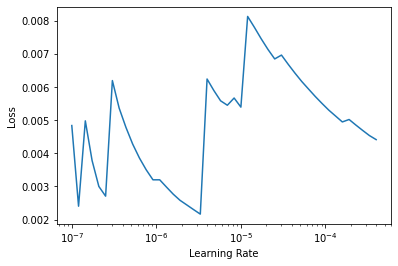

In [66]:
learn3.lr_find()

In [69]:
# all layers now trainable
#learn3.unfreee()
# optionally, separate LR and WD for each group
learn3.fit_one_cycle(20, lr_max=(1e-7, 1e-6, 1e-5), wd=(1e-7,1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.005674,0.173849,0.971660,0.028340,00:07
1,0.003161,0.190694,0.971660,0.028340,00:07
2,0.005286,0.187964,0.971660,0.028340,00:07
3,0.005433,0.195104,0.971660,0.028340,00:07
4,0.004281,0.178705,0.971660,0.028340,00:07
5,0.003516,0.205584,0.971660,0.028340,00:07
6,0.003221,0.213075,0.971660,0.028340,00:07
7,0.002819,0.186451,0.971660,0.028340,00:07
8,0.003080,0.192171,0.971660,0.028340,00:07
9,0.006537,0.203990,0.971660,0.028340,00:07


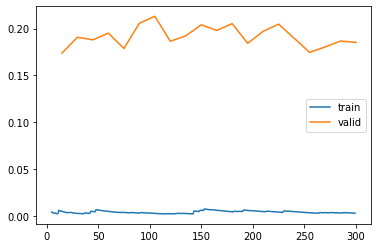

In [70]:
learn3.recorder.plot_loss()

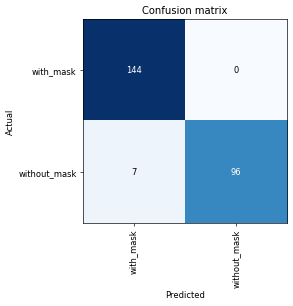

In [71]:
#width 600
interp = ClassificationInterpretation.from_learner(learn3)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [72]:
interp.print_classification_report()

              precision    recall  f1-score   support

   with_mask       0.95      1.00      0.98       144
without_mask       1.00      0.93      0.96       103

    accuracy                           0.97       247
   macro avg       0.98      0.97      0.97       247
weighted avg       0.97      0.97      0.97       247



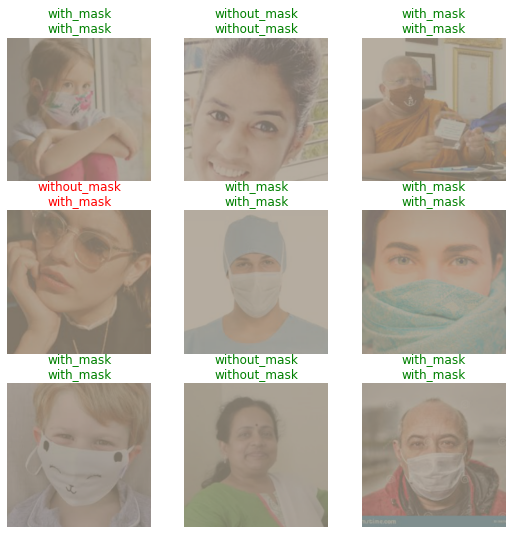

In [74]:
learn3.show_results()

# ResNet50

In [83]:
learn4 = cnn_learner(dls,models.resnet50,metrics=[accuracy,error_rate])
learn4.fine_tune(20)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.488739,0.192210,0.955466,0.044534,00:12


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.129155,0.183227,0.959514,0.040486,00:13
1,0.092633,0.228400,0.955466,0.044534,00:13
2,0.074343,0.121944,0.959514,0.040486,00:13
3,0.062924,0.133508,0.971660,0.028340,00:13
4,0.058622,0.152456,0.967611,0.032389,00:13
5,0.054082,0.155890,0.963563,0.036437,00:13
6,0.062498,0.057182,0.979757,0.020243,00:13
7,0.055609,0.045370,0.983806,0.016194,00:13
8,0.046119,0.170547,0.975708,0.024292,00:13
9,0.038606,0.105886,0.983806,0.016194,00:13


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.129155,0.183227,0.959514,0.040486,00:13
1,0.092633,0.228400,0.955466,0.044534,00:13
2,0.074343,0.121944,0.959514,0.040486,00:13
3,0.062924,0.133508,0.971660,0.028340,00:13
4,0.058622,0.152456,0.967611,0.032389,00:13
5,0.054082,0.155890,0.963563,0.036437,00:13
6,0.062498,0.057182,0.979757,0.020243,00:13
7,0.055609,0.045370,0.983806,0.016194,00:13
8,0.046119,0.170547,0.975708,0.024292,00:13
9,0.038606,0.105886,0.983806,0.016194,00:13


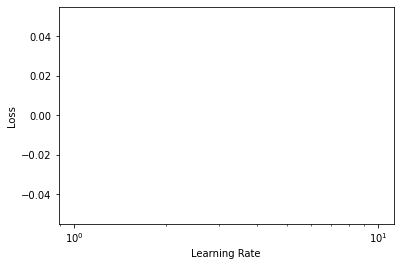

In [84]:
learn4.lr_find()

In [85]:
# all layers now trainable
#learn4.unfreee()
# optionally, separate LR and WD for each group
learn4.fit_one_cycle(20, lr_max=(1e-7, 1e-6, 1e-5), wd=(1e-4,1e-4,1e-1))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.002083,0.218134,0.967611,0.032389,00:13
1,0.003864,0.250476,0.967611,0.032389,00:13
2,0.005240,0.225224,0.967611,0.032389,00:13
3,0.009428,0.236292,0.967611,0.032389,00:13
4,0.006342,0.220926,0.967611,0.032389,00:13
5,0.006063,0.189205,0.967611,0.032389,00:13
6,0.004696,0.211356,0.967611,0.032389,00:13
7,0.006484,0.220169,0.967611,0.032389,00:13
8,0.006380,0.188190,0.967611,0.032389,00:13
9,0.007236,0.164844,0.967611,0.032389,00:13


In [ ]:
learn4.recorder.plot_loss()

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn4)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [88]:
interp.print_classification_report()

              precision    recall  f1-score   support

   with_mask       0.95      1.00      0.98       144
without_mask       1.00      0.93      0.96       103

    accuracy                           0.97       247
   macro avg       0.98      0.97      0.97       247
weighted avg       0.97      0.97      0.97       247



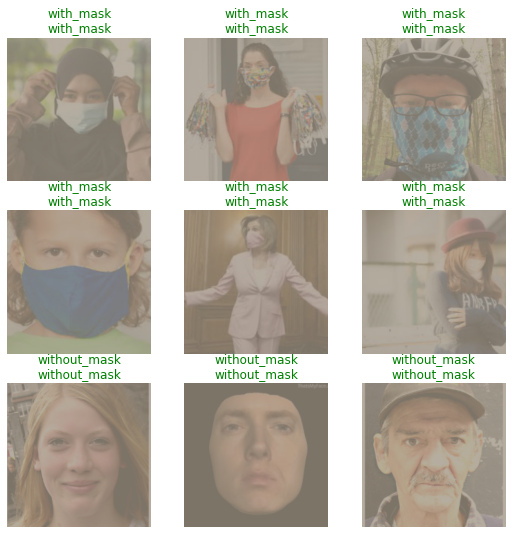

In [89]:
learn4.show_results()

# Densenet121

In [76]:
learn5 = cnn_learner(dls,models.densenet121,metrics=[accuracy,error_rate])
learn5.fine_tune(20)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.575211,0.087418,0.959514,0.040486,00:15


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.122279,0.086884,0.963563,0.036437,00:15
1,0.082840,0.073224,0.967611,0.032389,00:14
2,0.065204,0.046630,0.983806,0.016194,00:14
3,0.064255,0.025815,0.991903,0.008097,00:14
4,0.051032,0.023951,0.987854,0.012146,00:14
5,0.041843,0.131894,0.955466,0.044534,00:14
6,0.045046,0.031493,0.983806,0.016194,00:14
7,0.038809,0.022503,0.995951,0.004049,00:14
8,0.032158,0.035801,0.987854,0.012146,00:14
9,0.031742,0.145440,0.967611,0.032389,00:14


In [79]:
# all layers now trainable
#learn5.unfreee()
# optionally, separate LR and WD for each group
learn5.fit_one_cycle(20, lr_max=(1e-7, 1e-6, 1e-5), wd=(1e-4,1e-4,1e-1))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.001925,0.006959,1.000000,0.000000,00:14
1,0.004959,0.010812,0.991903,0.008097,00:14
2,0.004371,0.005862,1.000000,0.000000,00:14
3,0.005297,0.009152,0.991903,0.008097,00:14
4,0.004028,0.007585,0.995951,0.004049,00:14
5,0.003571,0.007234,0.995951,0.004049,00:14
6,0.003167,0.008791,0.995951,0.004049,00:14
7,0.002667,0.011447,0.991903,0.008097,00:14
8,0.002912,0.007179,1.000000,0.000000,00:14
9,0.004149,0.007191,1.000000,0.000000,00:14


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.001925,0.006959,1.000000,0.000000,00:14
1,0.004959,0.010812,0.991903,0.008097,00:14
2,0.004371,0.005862,1.000000,0.000000,00:14
3,0.005297,0.009152,0.991903,0.008097,00:14
4,0.004028,0.007585,0.995951,0.004049,00:14
5,0.003571,0.007234,0.995951,0.004049,00:14
6,0.003167,0.008791,0.995951,0.004049,00:14
7,0.002667,0.011447,0.991903,0.008097,00:14
8,0.002912,0.007179,1.000000,0.000000,00:14
9,0.004149,0.007191,1.000000,0.000000,00:14


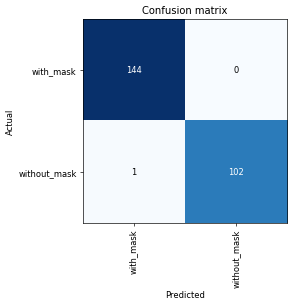

In [80]:
#width 600
interp = ClassificationInterpretation.from_learner(learn5)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [81]:
interp.print_classification_report()

              precision    recall  f1-score   support

   with_mask       0.99      1.00      1.00       144
without_mask       1.00      0.99      1.00       103

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



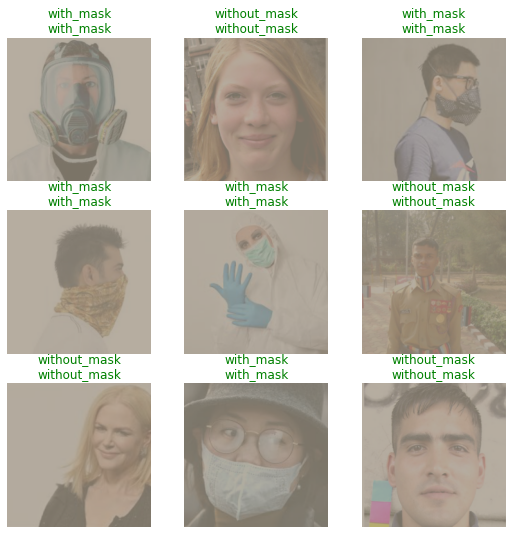

In [82]:
learn5.show_results()